In [1]:
# TODO

In [16]:
# imports
import os
import random
from itertools import chain

import matplotlib.pyplot as plt
import tensorflow as tf

from utils import load_image
from utils.face_detection import plot_face_detection, get_face_keypoints_detecting_function
from utils.mask_generator import load_mask_patterns, create_mask_keypoints_generator, get_face_with_mask

In [25]:
# parameters
path_to_data = 'data/lfw-deepfunneled'
path_to_face_with_mask_image = 'data/face_with_mask.jpg'
path_to_patterns = 'data/mask_patterns'
minimal_confidence = 0.8
hyp_ratio = 1 / 3
coordinates_range = (-10, 10)

In [4]:
# setup HW
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
# disable Error logging
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [26]:
# prepare functions
face_keypoints_detecting_fun = get_face_keypoints_detecting_function(minimal_confidence)
keypoints_for_mask_fun = create_mask_keypoints_generator(coordinates_range)

In [12]:
# load the dataset
# find-out all image files
files_faces = list(
    chain.from_iterable(
        [["{}/{}".format(folder, sub_folder) for sub_folder in os.listdir(os.path.join(path_to_data, folder))]
         for folder in os.listdir(path_to_data)]
    )
)
print("Samples: ", len(files_faces))

Samples:  13233


In [13]:
# load patterns for masks
patterns = load_mask_patterns(path_to_patterns)

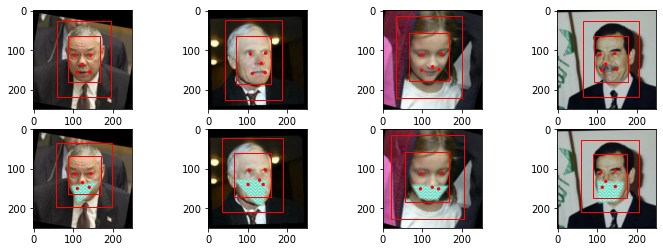

In [27]:
# show a few annotated faces
fig, axes = plt.subplots(2, 4, figsize=(12, 4))
for i, file in enumerate(random.sample(files_faces, 4)):
    image = load_image("{}/{}".format(path_to_data, file))
    image_with_mask = get_face_with_mask(image, patterns, face_keypoints_detecting_fun, keypoints_for_mask_fun)
    plot_face_detection(image, axes[0][i], face_keypoints_detecting_fun, hyp_ratio)
    plot_face_detection(image_with_mask, axes[1][i], face_keypoints_detecting_fun, hyp_ratio)